# Dados de texto de plágio

Neste projeto, você terá a tarefa de construir um detector de plágio que examina um arquivo de texto e executa a classificação binária; rotular esse arquivo como plagiado ou não, dependendo de quão semelhante o arquivo de texto é quando comparado a um texto fonte fornecido.

A primeira etapa para trabalhar com qualquer conjunto de dados é carregar os dados e observar quais informações estão incluídas no conjunto de dados. Essa é uma etapa importante para, eventualmente, trabalhar com esses dados e saber com quais tipos de recursos você deve trabalhar ao transformar e agrupar os dados!

Portanto, este bloco de notas trata de explorar os dados e observar padrões sobre os recursos que você recebe e a distribuição dos dados.

> Não há exercícios ou perguntas neste caderno, ele serve apenas para exploração. Este bloco de notas será necessário no envio do projeto final.

---

## Leia nos dados

A célula abaixo fará o download dos dados necessários e extrairá os arquivos para a pasta `data /`.

Esses dados são uma versão ligeiramente modificada de um conjunto de dados criado por Paul Clough (Estudos de Informação) e Mark Stevenson (Ciência da Computação), na Universidade de Sheffield. Você pode ler tudo sobre a coleta de dados e corpus, em [sua página da universidade](https://ir.shef.ac.uk/cloughie/resources/plagiarism_corpus.html).

> **Citação para dados**: Clough, P. e Stevenson, M. Developing A Corpus of Plagiarized Short Answers, Language Resources and Evaluation: Special Issue on Plagiarism and Authorship Analysis, In Press.[Download]


In [1]:
!wget https://s3.amazonaws.com/video.udacity-data.com/topher/2019/January/5c4147f9_data/data.zip
!unzip data

--2020-10-13 22:30:18--  https://s3.amazonaws.com/video.udacity-data.com/topher/2019/January/5c4147f9_data/data.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.152.150
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.152.150|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 113826 (111K) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>] 111.16K   478KB/s    in 0.2s    

2020-10-13 22:30:19 (478 KB/s) - ‘data.zip’ saved [113826/113826]

Archive:  data.zip
   creating: data/
  inflating: data/.DS_Store          
   creating: __MACOSX/
   creating: __MACOSX/data/
  inflating: __MACOSX/data/._.DS_Store  
  inflating: data/file_information.csv  
  inflating: __MACOSX/data/._file_information.csv  
  inflating: data/g0pA_taska.txt     
  inflating: __MACOSX/data/._g0pA_taska.txt  
  inflating: data/g0pA_taskb.txt     
  inflating: __MACOSX/data/._g0pA_taskb.txt  
  inflating: data/g0pA_taskc.txt     
  inflating

In [2]:
# import libraries
import pandas as pd
import numpy as np
import os

Este conjunto de dados de plágio é composto de vários arquivos de texto; cada um desses arquivos tem características que são resumidas em um arquivo `.csv` chamado` file_information.csv`, que podemos ler usando `pandas`.

In [3]:
csv_file = 'data/file_information.csv'
plagiarism_df = pd.read_csv(csv_file)

# print out the first few rows of data info
plagiarism_df.head(10)

,File,Task,Category
0,g0pA_taska.txt,a,non
1,g0pA_taskb.txt,b,cut
2,g0pA_taskc.txt,c,light
3,g0pA_taskd.txt,d,heavy
4,g0pA_taske.txt,e,non
5,g0pB_taska.txt,a,non
6,g0pB_taskb.txt,b,non
7,g0pB_taskc.txt,c,cut
8,g0pB_taskd.txt,d,light
9,g0pB_taske.txt,e,heavy


## Tipos de plágio

Cada arquivo de texto está associado a uma **Task** (tarefa A-E) e uma **Categoria** de plágio, que você pode ver no DataFrame acima.

### Cinco tipos de tarefas, A-E

Cada arquivo de texto contém uma resposta a uma pergunta curta; essas perguntas são rotuladas como tarefas A-E.
* Cada tarefa, A-E, é sobre um tópico que pode ser incluído no currículo de Ciência da Computação criado pelos autores deste conjunto de dados.
    * Por exemplo, a Tarefa A faz a pergunta: "O que é herança na programação orientada a objetos?"

### Quatro categorias de plágio

Cada arquivo de texto tem um rótulo / categoria de plágio associado:

1. `cut`: uma resposta é plagiada; é copiado e colado diretamente do texto-fonte relevante da Wikipedia.
2. `light`: uma resposta é plagiada; é baseado no texto fonte da Wikipedia e inclui algumas cópias e parafraseando.
3. `heavy`: uma resposta é plagiada; é baseado no texto fonte da Wikipedia, mas expresso em palavras e estruturas diferentes. Como isso não copia diretamente de um texto de origem, esse provavelmente será o tipo de plágio mais desafiador de detectar.
4. `non`: uma resposta não é plagiada; o texto-fonte da Wikipedia não é usado para criar esta resposta.
5. `orig`: Esta é uma categoria específica para o texto-fonte original da Wikipedia. Usaremos esses arquivos apenas para fins de comparação.

> Então, dos arquivos enviados, a única categoria que não contém nenhum plágio é `não`.

Na próxima célula, imprima algumas estatísticas sobre os dados.

In [4]:
# print out some stats about the data
print('Number of files: ', plagiarism_df.shape[0])  # .shape[0] gives the rows 
# .unique() gives unique items in a specified column
print('Number of unique tasks/question types (A-E): ', (len(plagiarism_df['Task'].unique())))
print('Unique plagiarism categories: ', (plagiarism_df['Category'].unique()))

Number of files:  100
Number of unique tasks/question types (A-E):  5
Unique plagiarism categories:  ['non' 'cut' 'light' 'heavy' 'orig']


Você deve ver o número de arquivos de texto no conjunto de dados, bem como algumas características sobre as colunas `Tarefa` e` Categoria`. **Observe que a contagem de arquivos de 100 * inclui * os 5 arquivos wikipedia _original_ para tarefas AE.** Se você der uma olhada nos arquivos no diretório `data`, notará que os textos originais começam com o nome do arquivo ʻorig_` em oposição a `g` para" grupo ".

> Portanto, no total, existem 100 arquivos, 95 dos quais são respostas (enviadas por pessoas) e 5 dos quais são os textos-fonte originais da Wikipedia.

Seu objetivo final será usar essas informações para classificar qualquer texto de resposta em uma das duas categorias, plagiado ou não plagiado.

### Distribuição de dados

A seguir, vamos examinar a distribuição dos dados. Neste curso, falamos sobre características como desequilíbrio de classe que podem informar como você desenvolve um algoritmo. Então, aqui, perguntaremos: ** Quão uniformemente nossos dados são distribuídos entre as diferentes tarefas e níveis de plágio? **

Abaixo, você deve observar duas coisas:
* Nosso conjunto de dados é bastante pequeno, especialmente no que diz respeito a exemplos de níveis variáveis de plágio.
* Os dados são distribuídos de maneira bastante uniforme entre os tipos de tarefa e plágio.

In [5]:
# Show counts by different tasks and amounts of plagiarism

# group and count by task
counts_per_task=plagiarism_df.groupby(['Task']).size().reset_index(name="Counts")
print("\nTask:")
display(counts_per_task)

# group by plagiarism level
counts_per_category=plagiarism_df.groupby(['Category']).size().reset_index(name="Counts")
print("\nPlagiarism Levels:")
display(counts_per_category)

# group by task AND plagiarism level
counts_task_and_plagiarism=plagiarism_df.groupby(['Task', 'Category']).size().reset_index(name="Counts")
print("\nTask & Plagiarism Level Combos :")
display(counts_task_and_plagiarism)


Task:


,Task,Counts
0,a,20
1,b,20
2,c,20
3,d,20
4,e,20



Plagiarism Levels:


,Category,Counts
0,cut,19
1,heavy,19
2,light,19
3,non,38
4,orig,5



Task & Plagiarism Level Combos :


,Task,Category,Counts
0,a,cut,4
1,a,heavy,3
2,a,light,3
3,a,non,9
4,a,orig,1
5,b,cut,3
6,b,heavy,4
7,b,light,3
8,b,non,9
9,b,orig,1


Também pode ser útil olhar graficamente este último DataFrame.

Abaixo, você pode ver que as contagens seguem um padrão dividido por tarefa. Cada tarefa tem um texto fonte (original) e o maior número em casos `não` plagiados.

<BarContainer object of 25 artists>

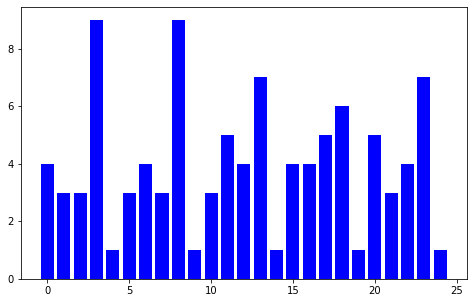

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

# counts
group = ['Task', 'Category']
counts = plagiarism_df.groupby(group).size().reset_index(name="Counts")

plt.figure(figsize=(8,5))
plt.bar(range(len(counts)), counts['Counts'], color = 'blue')

## A seguir

Este bloco de notas trata apenas de carregamento e exploração de dados, e você não precisa incluí-lo no envio final do projeto.

Nos próximos blocos de notas, você usará esses dados para treinar um classificador de plágio completo. Você terá a tarefa de extrair recursos significativos dos dados do texto, lendo as respostas para diferentes tarefas e comparando-as com o texto-fonte original da Wikipedia. Você criará recursos de similaridade que ajudarão a identificar casos de plágio. Em seguida, você usará esses recursos para treinar e implantar um modelo de classificação em uma instância de notebook SageMaker. 